# Magnitud de la Operación Minera

Evaluación de la magnitud de las operaciones mineras.

In [3]:
#Revisar librerias

import pandas as pd
import numpy as np
#from numpy import random
from math import log
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox
from ipyfilechooser import FileChooser
import glob

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

#Distribucion Normal
from scipy.stats import norm, kstest

#Test de normalidad
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

#
from termcolor import colored, cprint

#widgets
import ipywidgets as widgets

In [4]:
#Definición de mineria depequeña escala
smallScaleMin = 3200 
smalScaleMax  = 1000000

logSmallScaleMin = np.log10(smallScaleMin)
logSmallScaleMax  = np.log10(smalScaleMax)

In [18]:
modelLst = ["15a", "25e", "25c", "25g", "25b", "22c", "34f"]
modelDict = {"15a":"6a", "25e":"7c", "25c":"7b", "25g":"7a", "25b":"7e", "22c":"14c", "34f":"9e"}

In [33]:
# Trying to be more generic

yacModelsFileLst = glob.glob("data/*.csv")

style = {'description_width': 'initial'}

yacModelWidget = widgets.Dropdown(
    options     = yacModelsFileLst,
    description = 'Deposit Models',
    style       = style
)

yacModelWidget

#ToDo Analyze and Select elements

Dropdown(description='Deposit Models', options=('data\\15a.csv', 'data\\22c.csv', 'data\\25a.csv', 'data\\25b.…

In [19]:
modelType = widgets.Dropdown(options=modelLst,
                             description='Modelo de Depósito:',
                             disabled=False,)
display(modelType)

Dropdown(description='Modelo de Depósito:', options=('15a', '25e', '25c', '25g', '25b', '22c', '34f'), value='…

In [38]:
#Se guardan los datos y parametros como tuples 

fileName = yacModelWidget.value
#print(fileName)
modelTable = pd.read_csv(fileName)
#modelTable.head()
    
#Por cada modelo hay que obtener los estadisticos de Tonne
modelTonne = modelTable["tonn"]
modelTuple = (modelType.value,
              modelTonne,
              modelTonne.size, 
              modelTonne.min(), 
              modelTonne.max(), 
              np.mean(modelTonne), 
              np.median(modelTonne) )

In [39]:
print(f"Modelo: %s, %s, %s, {modelTuple[5]:.2f}, {modelTuple[6]:.2f}" % (modelTuple[0],modelTuple[3], modelTuple[4] ))

Modelo: 25c, 7000.0, 83000000.0, 4223170.73, 757000.00


In [40]:
#Obtención del logaritmo 10 de los tonelajes
modelDataTonne = np.log10(np.array(modelTuple[1]))

In [41]:
# Widget Definition
lang = widgets.RadioButtons(
    options=['English', 'Español'],
    description='Languaje/Idioma',
    value="Español",
    disabled=False
)


In [42]:
lang

RadioButtons(description='Languaje/Idioma', index=1, options=('English', 'Español'), value='Español')

In [43]:
# translation dictionary

if lang.value == 'English':
    ItemTitle     = "Select Tonneage Item"
    ItemYacName   = "Select deposit name item"
    ItemYacTonn   = "Select Tonneage Item"
    DiagramTitle  = "Mining Operation Magnitude"
    DiagramXLabel = "Tonnage (log 10 scale)"
    DiagramLabel1 = "Small Scale Mining"
    DiagramLabel2 = "Large Scale Mining"

else:
    ItemTitle     = "Seleccione Tonelaje"
    ItemYacName   = "Seleccione Nombre del depósito"
    ItemYacTonn   = "Seleccionar item de tonelaje"
    DiagramTitle  = "Magnitud de la Operación Minera"
    DiagramXLabel = "Tonelage (escala log 10)"
    DiagramLabel1 = "Región de la Minería de Pequeña Escala"
    DiagramLabel2 = "Región de la Minería de Gran Escala"

## File format

CSV Comma Separated Values

### Example

|DepName               ,| Tonn     ,|   Au,|    Ag|
|-----------------------|-----------|------|------|
|"Calcatreu v49-Nelson",|  7830000,| 2.28,| 20.29|
|"Castro Sur"          ,|  2010000,| 1.40,| 14.77|

DepName: Mining deposit name

Tonn   : Toneage

Au, Ag, etc.: Commodity


## BOX Plots

In [27]:
fc = FileChooser(
    title='Select File'
)
display(fc)

FileChooser(path='D:\Users\gasato\anacondaProjects\NumericalMiningDepositsModelling', filename='', title='Sele…

In [28]:
yacData = pd.read_csv(fc.selected)
yacData

,DepName,IndicTonn,Au,Ag
0,Calcatreu v49-Nelson,7830000,2.28,20.29
1,Castro Sur,2010000,1.40,14.77


In [29]:
yacDataColumnsLst = yacData.columns.to_list()

style2 = {'description_width': 'initial'}

l2 = widgets.Label(value=ItemTitle)

yacNameWidget = widgets.Dropdown(
    options     = yacDataColumnsLst,
    description = ItemYacName,
    style       = style2
)

yacTonnWidget = widgets.Dropdown(
    options     = yacDataColumnsLst,
    description = ItemYacTonn,
    style       = style2
)


In [30]:
VBox([l2, yacNameWidget, yacTonnWidget])

In [31]:
# loop through the rows using iterrows()
for index, row in yacData.iterrows():
    print(row[yacNameWidget.value])

Calcatreu v49-Nelson
Castro Sur          


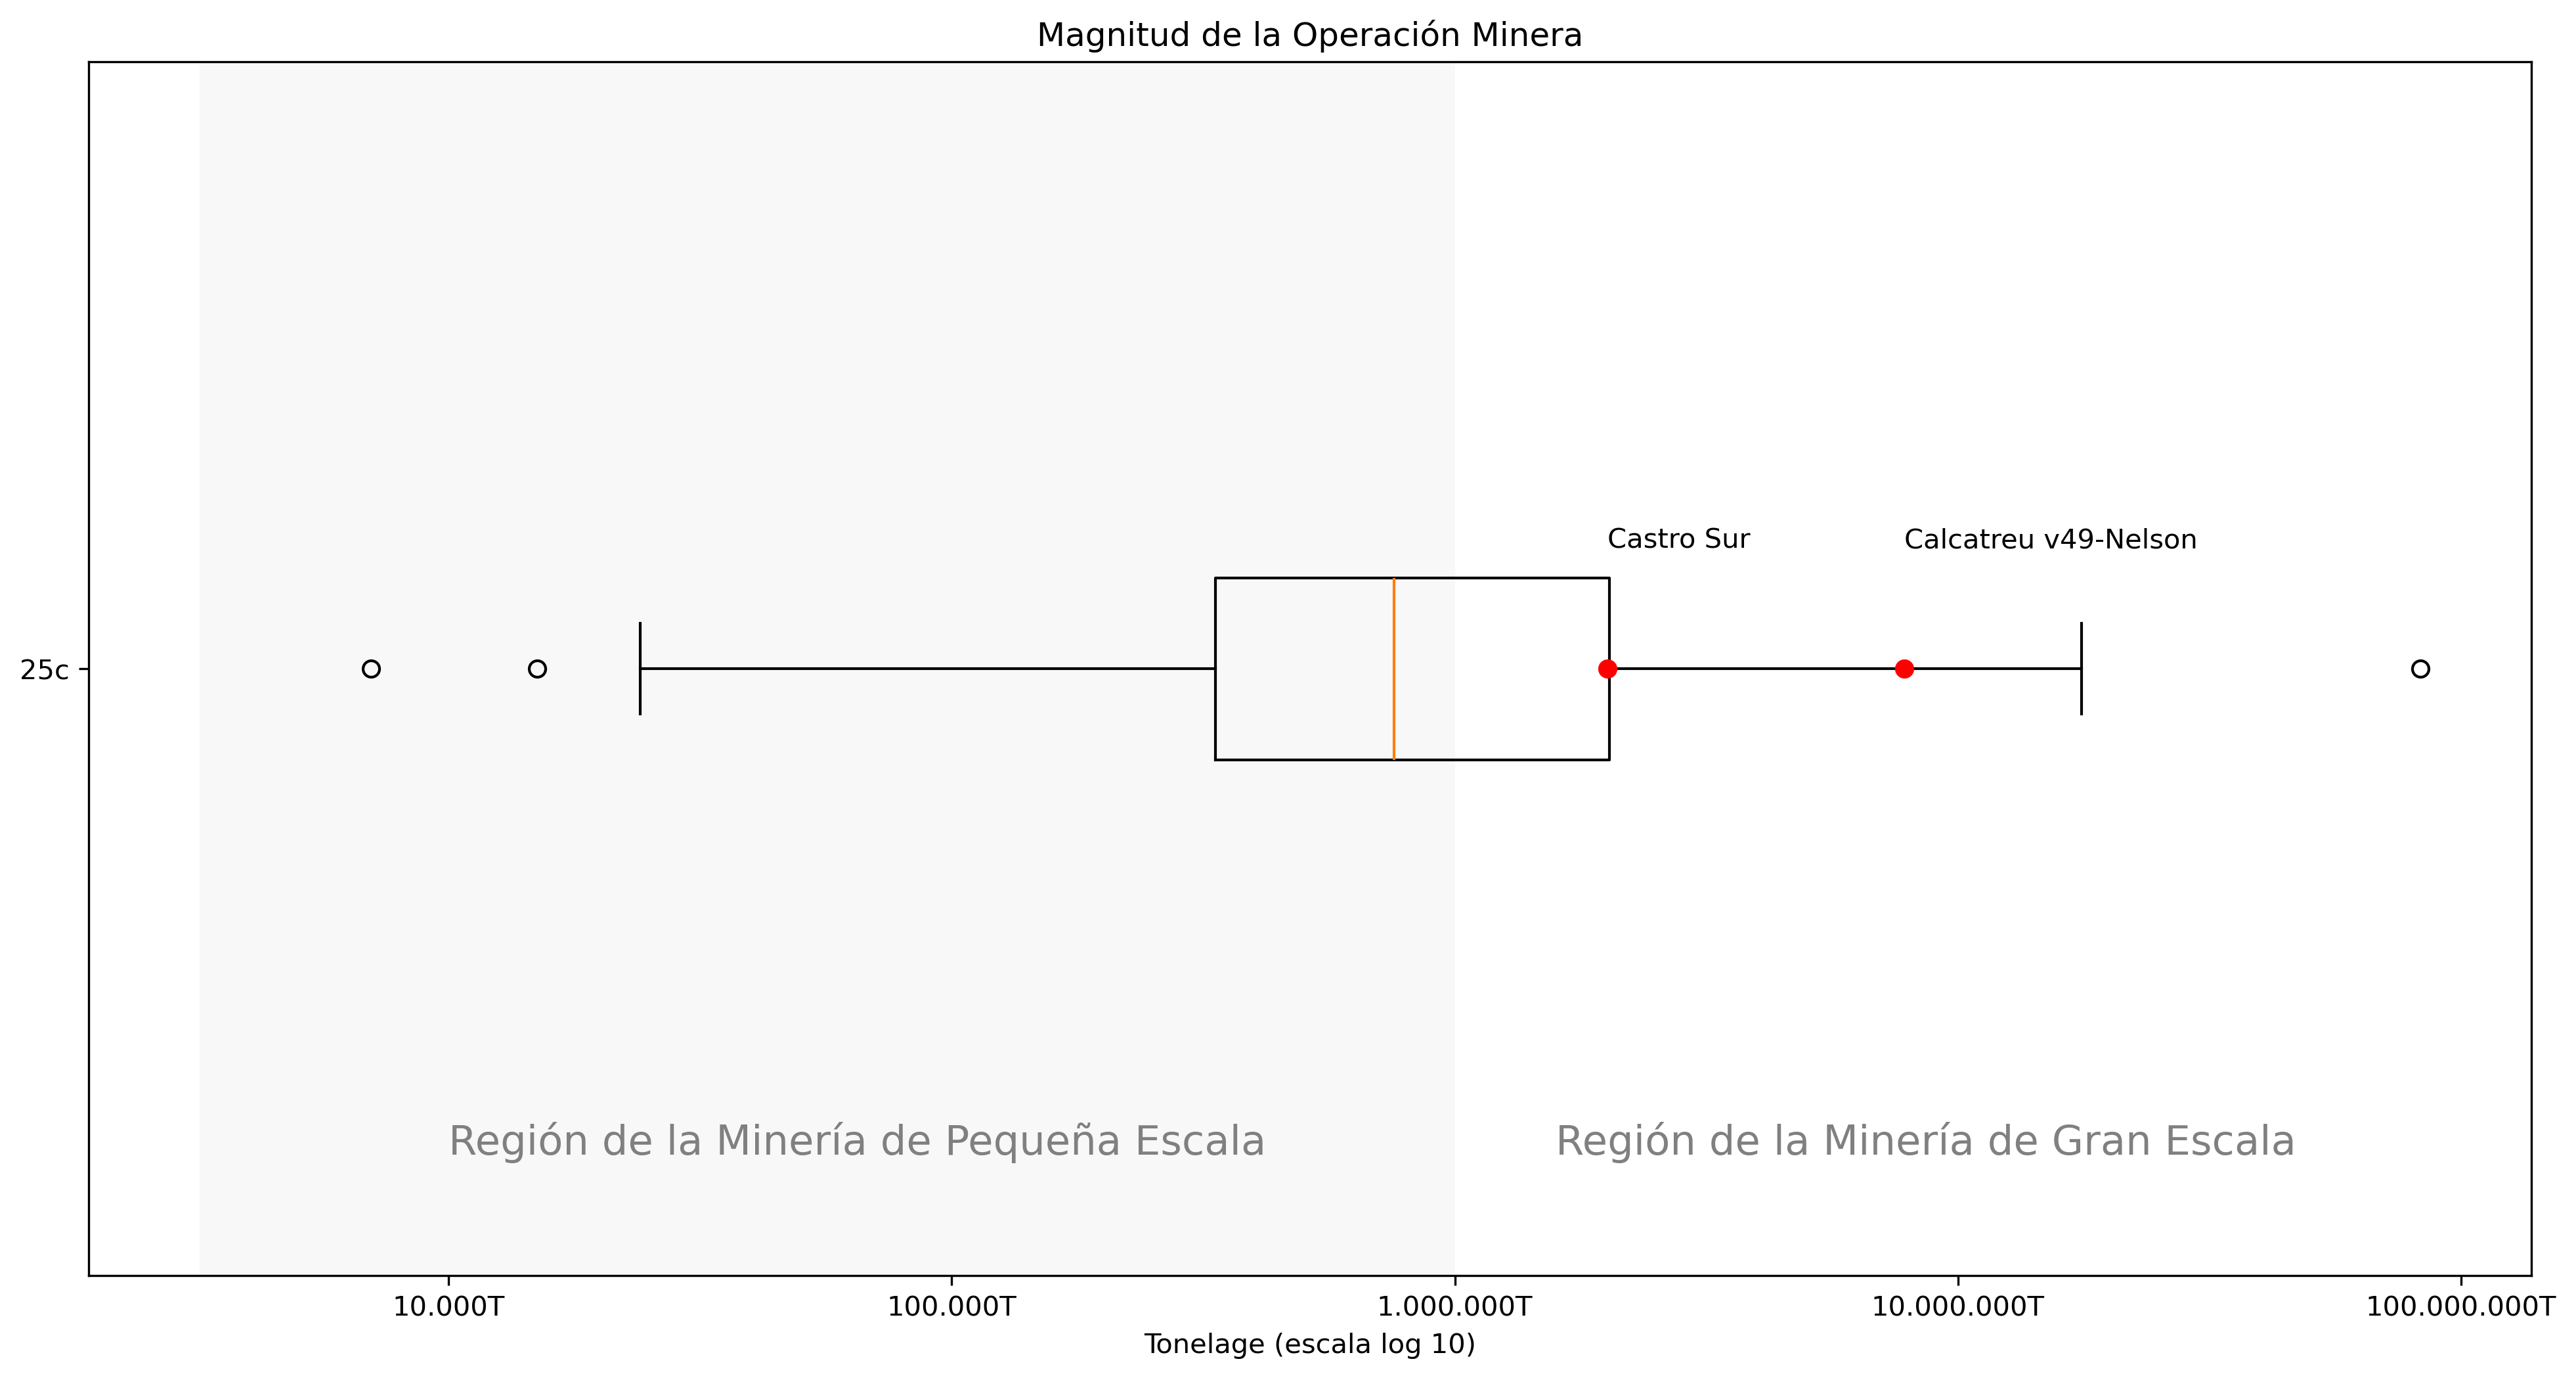

In [32]:
# Diagram configuration

plt.figure(num=None, figsize=(16, 8), dpi=300, facecolor='w', edgecolor='k')

plt.title(DiagramTitle)
plt.xlabel(DiagramXLabel)
#plt.ylabel("Modelos de Depósitos")


b         = plt.boxplot(modelDataTonne, vert=False, patch_artist=False,)
bWhiskers =[item.get_xdata() for item in b['whiskers']]
bMedians  =[item.get_xdata() for item in b['medians']]
bCaps     =[item.get_xdata() for item in b['caps']]
bBoxes    =[item.get_xdata() for item in b['boxes']]

plt.yticks([1], [modelType.value] ) #AHORA

locs, currentXticks = plt.xticks()
#xTickLabelLst = [ '{:,.0f}'.format(x)for x in 10 ** currentXticks]

plt.axvspan(logSmallScaleMin, logSmallScaleMax, facecolor='#bbbbbb', alpha=0.1)

currentXticks = [4,5,6,7,8,9,10,11]
#xTickLabelLst = [['{:,.0f}T'.format( 10 ** x) for x in currentXticks]]
xTickLabelLst = ['10.000T', '100.000T', '1.000.000T', '10.000.000T', '100.000.000T', '1.000.000.000T',
                 '10.000.000.000T', '100.000.000.000T']

plt.xticks(currentXticks, xTickLabelLst) #AHORA

#currentXticks = plt.xticks()[0]
#xTickLabelLst = ['{:,.0f}'.format(x) for x in 10 ** currentXticks]


#plt.axvline(x=logSmallScaleMin, color='r')
#plt.axvline(x=logSmallScaleMax, color='r')

plt.text(4, 0.6, DiagramLabel1, fontsize=15, color="grey")
plt.text(6.2, 0.6, DiagramLabel2, fontsize=15, color="grey")


#Ploteo de los depósitos
# loop through the rows using iterrows()
for index, row in yacData.iterrows():
    plt.plot(np.log10(row[yacTonnWidget.value]),1, 'ro')
    plt.text(np.log10(row[yacTonnWidget.value]), 1.10,row[yacNameWidget.value] )


#plt.plot([4.38021124,  8.02938378],[1,1],'ro')
#plt.plot(6.13987909,1,'go')
#plt.plot([5.58795875, 6.86763972],[1,1], 'bo')

plt.show()